In [1]:
# Melvina Quartey RIN:662067086
#Machine Learning Homework 1

In [5]:

import numpy as np

In [3]:
#Question 1

In [4]:
x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])
#a. There are 5 features in x1 and 4 features in x2
#b...

In [5]:
l1_norm_x1 = np.linalg.norm(x1, ord=1)
l2_norm_x1 = np.linalg.norm(x1, ord=2)
linfinity_norm_x1 = np.linalg.norm(x1, ord=np.inf)
l1_norm_x2 = np.linalg.norm(x2, ord=1)
l2_norm_x2 = np.linalg.norm(x2, ord=2)
linfinity_norm_x2 = np.linalg.norm(x2, ord=np.inf)
print("L1 norm of x1:", l1_norm_x1)
print("L2 norm of x1:", l2_norm_x1)
print("L∞ norm of x1:", linfinity_norm_x1)
print("L1 norm of x2:", l1_norm_x2)
print("L2 norm of x2:", l2_norm_x2)
print("L∞ norm of x2:", linfinity_norm_x2)



L1 norm of x1: 26.0
L2 norm of x1: 13.19090595827292
L∞ norm of x1: 9.0
L1 norm of x2: 98.0
L2 norm of x2: 89.16277250063504
L∞ norm of x2: 89.0


In [6]:
#2 (Multiple channels = 3(Red-Green-Blue values))
#a and b
x_length = 1024*1024*3
y_length = 64*64*3

print("Length of input vector, x, is",x_length)
print("Length of output vector, y, is", y_length)

Length of input vector, x, is 3145728
Length of output vector, y, is 12288


In [31]:
#c
print("W has", y_length*x_length, "elements") 
print("b has", y_length, "elements") 

#for y=Wx+b, where y is n*1, b is n*1 and x is m*1, W must be n*m size
#for matrix multiplication rule (n*m)(m*1)=> n*1 to hold

W has 38654705664 elements
b has 12288 elements


In [35]:
#3

W = np.array([[1,-1],[2,0]])
norm_1_W = np.linalg.norm(W, ord=1)
norm_2_W = np.linalg.norm(W, ord=2)
norm_inf_W = np.linalg.norm(W, ord=np.inf)
norm_frobenius_W = np.linalg.norm(W, ord='fro')
print("1 norm of W:", norm_1_W)
print("2 norm of W:", norm_2_W)
print("∞ norm of W:", norm_inf_W)
print("Frobenius norm of W:", norm_frobenius_W)


1 norm of W: 3.0
2 norm of W: 2.2882456112707374
∞ norm of W: 2.0
Frobenius norm of W: 2.449489742783178


In [6]:
#4
from sklearn import datasets

iris = datasets.load_iris()
iris.feature_names
iris.target_names
X = iris.data[:,[0,2,3]] # selecting three features: sepal length, petal length and petal width
y = iris.target

%notebook inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print("preds", preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)




preds [1 1 1 1 0 2 2 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9666666666666667


In [4]:
#5
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

#define input (X) and output (y), done by calulating 7th root of X in a separate code
X = np.array([1, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100])
X = X*1.0
y = np.array([1.0, 1.219, 1.346, 1.426, 1.486, 1.534, 1.575, 1.61, 1.641, 1.669, 1.694, 1.717, 1.739, 1.759, 1.777, 1.795, 1.811, 1.827, 1.842, 1.856, 1.87, 1.883, 1.896, 1.908, 1.92, 1.931])
y = y*1.0
#define keras model (neural network)
model = Sequential()
model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)
X_new = np.array([[i] for i in range(1, 101)])
X_new = X_new * 1.0

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=3000,batch_size=10, verbose=0) # model is trying to learn here
model.summary()
#make class predictions with the model
y_new = model.predict(X_new)
#printing 7th roots from 1-100 
for i in range(100):
    print('[%.f] => %.3f' % (X_new[i][0], y_new[i][0]))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step
[1] => 0.999
[2] => 1.214
[3] => 1.220
[4] => 1.221
[5] => 1.261
[6] => 1.316
[7] => 1.370
[8] 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                40        
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 901 (3.52 KB)
Trainable params: 901 (3.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step
[5.1] => 1.94 (expected 1.40)
[4.9] => 1.74 (expected 1.40)
[4.7] => 1.54 (expected 1.30)
[4.6] => 1.44 (

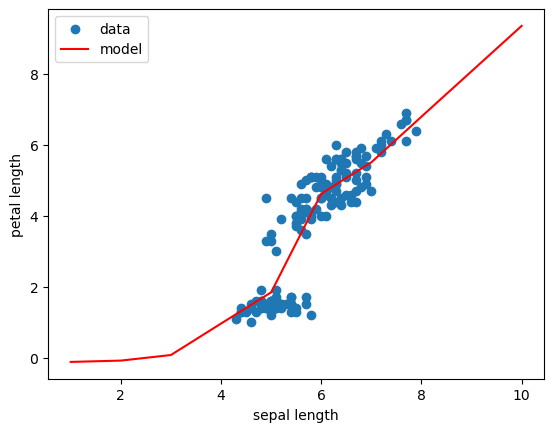

In [7]:
#6
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[0]] #sepal length
Y = iris.data[:,[2]] #petal length
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

#split into input (X) and output (Y)
X = np.array(X)
X = X*1.0
Y = np.array(Y)
Y = Y*1.0

#define keras model
model = Sequential()

model.add(Dense(20,input_dim=1,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,Y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

for i in range(150):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], Y[i]) )
    
#plotting the data
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 10, 10)
plt.scatter(X,Y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()